In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as px
import numpy as np
from datetime import datetime

In [26]:
dir_name = "./tests_weights/"
NB_ITERS_CELL = "C2"

In [27]:
arr = os.listdir(dir_name)
arr = [a for a in arr if a[0:3] == 'one']
filenames = [dir_name + a for a in arr if a[0:3] == 'one']
filenames

['./tests_weights/one_point_test23_coverage2.xlsx',
 './tests_weights/one_point_test23_balance1.xlsx',
 './tests_weights/one_point_test23_coverage3.xlsx',
 './tests_weights/one_point_test23_fairness1.xlsx',
 './tests_weights/one_point_test23_fairness2.xlsx',
 './tests_weights/one_point_test23_balance3.xlsx',
 './tests_weights/one_point_test23_balance2.xlsx',
 './tests_weights/one_point_test23_fairness3.xlsx',
 './tests_weights/one_point_test23_coverage1.xlsx']

In [28]:
config_names = ["config" + a.split('test')[1].split('.')[0] for a in arr]
config_names

['config23_coverage2',
 'config23_balance1',
 'config23_coverage3',
 'config23_fairness1',
 'config23_fairness2',
 'config23_balance3',
 'config23_balance2',
 'config23_fairness3',
 'config23_coverage1']

In [29]:
def get_sub_pops(nb_iterations):
    sub_pops = ["LO", "MO", "RO", "LM", "MM", "RM", "TOP"]
    sub_pop_list = []
    for x in sub_pops:
        sub_pop_list += [x] * nb_iterations
    sub_pop_list.append("TOP")
    return sub_pop_list

def read_df(fname):
    df = pd.read_excel(fname, sheet_name="Blad2")
    df = df.drop(columns=['Unnamed: 0'])

    wb = px.load_workbook(fname)
    ws = wb["params"]
    nb_iterations = ws[NB_ITERS_CELL].value
    
    
    df["relative iteration"] = [x for x in range(1, 1 + nb_iterations)] * 7 + [nb_iterations + 1]
    df["Sub population"] = get_sub_pops(nb_iterations)
    
    return df

In [30]:
def append_dfs(filenames):
    df_full = pd.DataFrame()
    i = 0
    while i < len(filenames):
        df = read_df(filenames[i])
        df['config'] = [config_names[i]] * len(df)
        df['iteration'] = [i for i in range(1, 1 + len(df))]
        
        df_full = df_full.append(df, ignore_index=True)
    
        i += 1
    return df_full

In [31]:
def create_df2(df):
    df2 = pd.DataFrame()
    df2["config"] = config_names

    bests = []
    covs = []
    bals = []
    fairs = []
    times = []

    for con in config_names:
            cur_df = df[df['config'] == con]
            bests.append(list(cur_df['best'])[-1])
            covs.append(list(cur_df['coverage'])[-1])
            bals.append(list(cur_df['balance'])[-1])
            fairs.append(list(cur_df['fairness'])[-1])
            times.append(get_time_from_config(df, con))
    df2["best"] = bests
    df2["coverage"] = covs
    df2["balance"] = bals
    df2["fairness"] = fairs
    df2["time"] = times
    return df2

In [32]:
def get_time_from_config(df, config_name):
    df_config = df[df.config.str.contains(config_name)]
    return (list(df_config['time'])[-1] - list(df_config['time'])[0]).seconds

In [45]:
df = append_dfs(filenames)

In [46]:
df

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population,config,iteration
0,1900.112319,1658,3397.250,24.0,2234.968724,1900-01-01 19:55:56,1,LO,config23_coverage2,1
1,1840.117754,1547,3414.375,21.5,2124.535555,1900-01-01 19:55:57,2,LO,config23_coverage2,2
2,1781.300725,1499,3300.250,24.5,2044.136366,1900-01-01 19:55:58,3,LO,config23_coverage2,3
3,1722.297101,1535,3011.500,22.0,1970.743038,1900-01-01 19:55:59,4,LO,config23_coverage2,4
4,1661.413043,1440,2992.500,18.0,1904.137062,1900-01-01 19:56:00,5,LO,config23_coverage2,5
...,...,...,...,...,...,...,...,...,...,...
10714,7.100000,0,22.875,3.0,9.474843,1900-01-01 22:03:20,167,TOP,config23_coverage1,1187
10715,7.100000,0,22.875,3.0,9.497706,1900-01-01 22:03:21,168,TOP,config23_coverage1,1188
10716,7.100000,0,22.875,3.0,9.459039,1900-01-01 22:03:22,169,TOP,config23_coverage1,1189
10717,7.100000,0,22.875,3.0,9.506608,1900-01-01 22:03:22,170,TOP,config23_coverage1,1190


In [47]:
df2 = create_df2(df)
df2  = df2.sort_values(by=['config'])
df2

,config,best,coverage,balance,fairness,time
1,config23_balance1,5.625000,14,3.500,4.0,872
6,config23_balance2,3.916667,14,2.000,4.0,800
5,config23_balance3,2.600806,30,0.000,3.5,890
8,config23_coverage1,7.100000,0,22.875,3.0,821
0,config23_coverage2,10.103774,0,40.250,3.5,928
2,config23_coverage3,10.363636,0,79.875,4.5,918
3,config23_fairness1,6.000000,2,16.500,3.0,793
4,config23_fairness2,4.574074,0,15.875,3.0,795
7,config23_fairness3,3.968085,16,14.625,2.0,802


In [36]:
tmp_sum = np.add(df2['coverage'], df2['balance'])
totals = np.add(tmp_sum, df2['fairness'])
df2['total'] = totals
df2.drop(columns=['config'])

,best,coverage,balance,fairness,time,total
1,5.625000,14,3.500,4.0,872,21.500
6,3.916667,14,2.000,4.0,800,20.000
5,2.600806,30,0.000,3.5,890,33.500
8,7.100000,0,22.875,3.0,821,25.875
0,10.103774,0,40.250,3.5,928,43.750
2,10.363636,0,79.875,4.5,918,84.375
3,6.000000,2,16.500,3.0,793,21.500
4,4.574074,0,15.875,3.0,795,18.875
7,3.968085,16,14.625,2.0,802,32.625


In [13]:
df2['cr_mr'] = ['0.6 0.6', '0.6 0.8', '0.8 0.8', '0.9 0.9', '0.95 0.95']

ValueError: Length of values (5) does not match length of index (2)

In [48]:
df2_cov = df2[df2.config.str.contains('coverage')]
df2_bal = df2[df2.config.str.contains('balance')]
df2_fair = df2[df2.config.str.contains('fairness')]

In [17]:
df2 = df2[df2.coverage < 4]
df2 = df2[df2.balance < 14]
df2

,config,best,coverage,balance,fairness,time,total
0,config23_no_holidays,4.291667,0,8.50,3.5,3093,12.00
1,config23_no_holidays_improvement,5.250000,0,10.75,4.0,1031,14.75


In [18]:

df2['nb best'] = [200, 600, 1000, 1400, 1800]
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

fig.suptitle('Number of parents: 2000')


sns.barplot(ax=axes[0], data=df2, x='nb best', y='best')

sns.barplot(ax=axes[ 1], data=df2, x='nb best', y='time')

ValueError: Length of values (5) does not match length of index (2)

In [19]:
df2['configuration'] = [i for i in range(len(df2))]
df2['nb parents'] = [800, 1200, 1600, 2000, 2400]
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

fig.suptitle('Stats')


sns.barplot(ax=axes[0], data=df2, x='nb parents', y='best')

sns.barplot(ax=axes[ 1], data=df2, x='nb parents', y='time')

ValueError: Length of values (5) does not match length of index (2)

ValueError: Could not interpret input 'cr_mr'

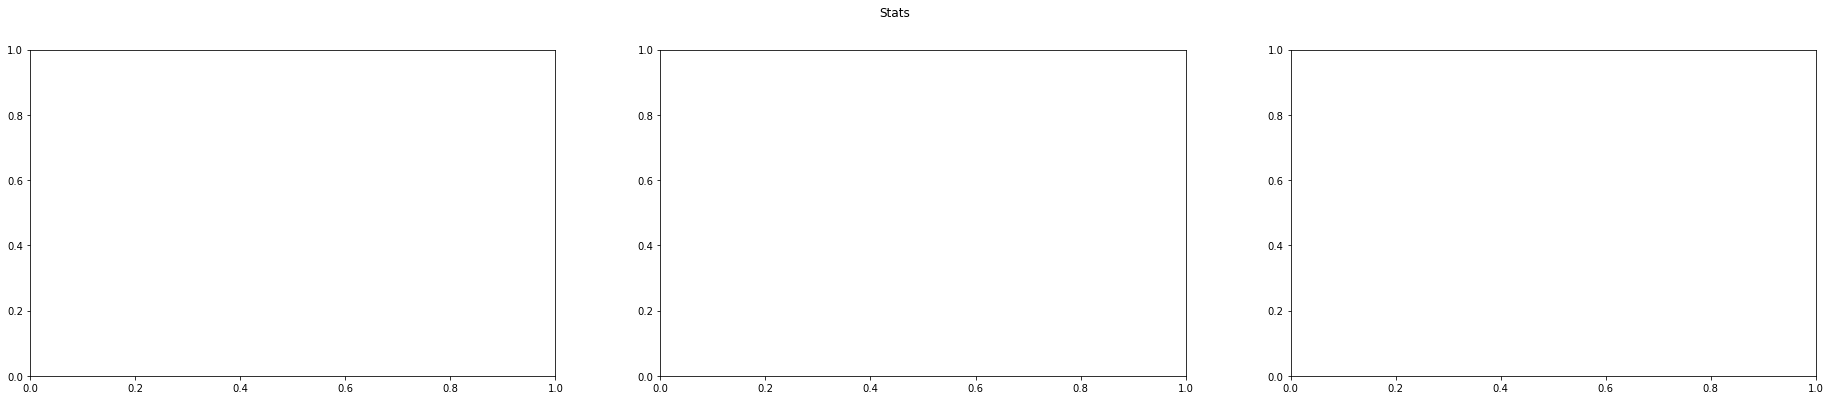

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(32, 6))

fig.suptitle('Stats')

#sns.barplot(ax=axes[0, 0], data=df2, x='cr_mr', y='total')
#sns.barplot(ax=axes[0, 1], data=df2, x='cr_mr', y='best')
sns.barplot(ax=axes[ 0], data=df2, x='cr_mr', y='coverage')
sns.barplot(ax=axes[1], data=df2, x='cr_mr', y='balance')
sns.barplot(ax=axes[ 2], data=df2, x='cr_mr', y='fairness')
#sns.barplot(ax=axes[2, 1], data=df2, x='cr_mr', y='time')



<AxesSubplot:xlabel='config', ylabel='fairness'>

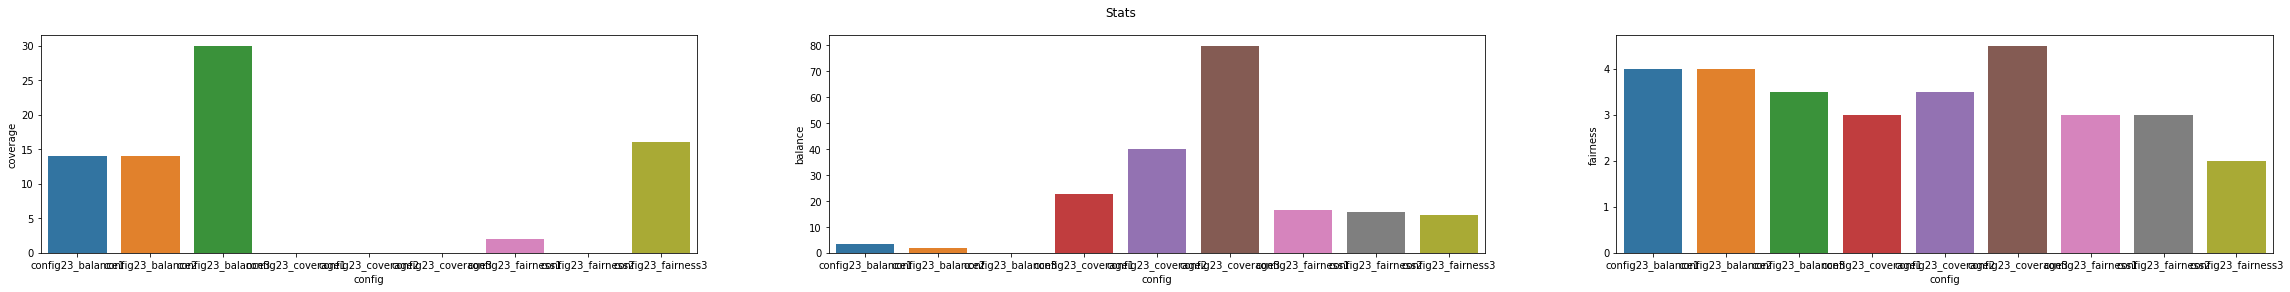

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(40, 4))

fig.suptitle('Stats')

sns.barplot(ax=axes[0], data=df2, x='config', y='coverage')
sns.barplot(ax=axes[1], data=df2, x='config', y='balance')
sns.barplot(ax=axes[2], data=df2, x='config', y='fairness')


<AxesSubplot:xlabel='config', ylabel='fairness'>

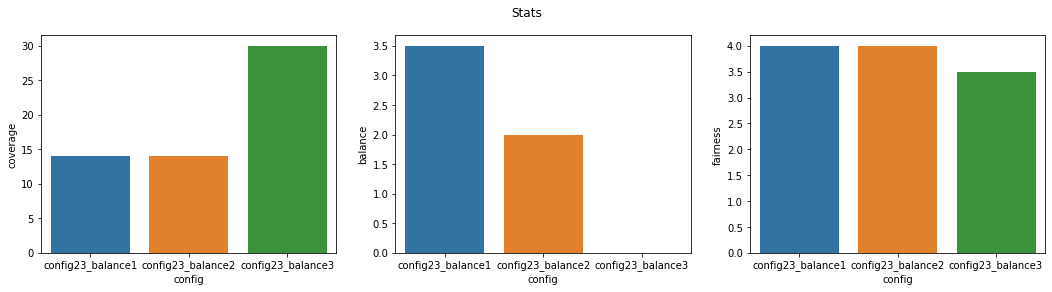

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

fig.suptitle('Stats')


sns.barplot(ax=axes[0], data=df2_bal, x='config', y='coverage')
sns.barplot(ax=axes[1], data=df2_bal, x='config', y='balance')
sns.barplot(ax=axes[2], data=df2_bal, x='config', y='fairness')



<AxesSubplot:xlabel='config', ylabel='fairness'>

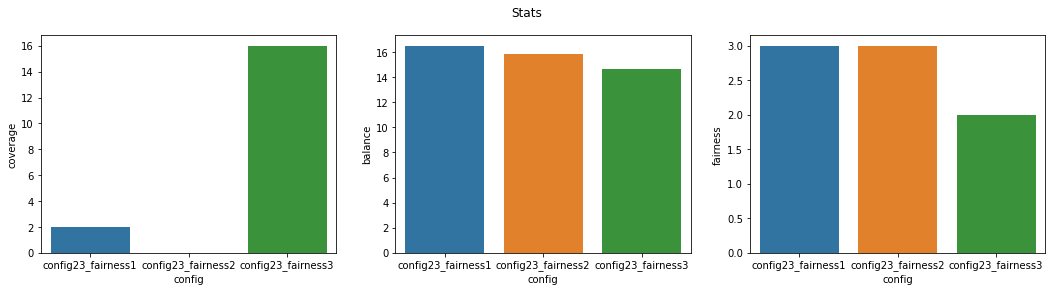

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

fig.suptitle('Stats')


sns.barplot(ax=axes[0], data=df2_fair, x='config', y='coverage')
sns.barplot(ax=axes[1], data=df2_fair, x='config', y='balance')
sns.barplot(ax=axes[2], data=df2_fair, x='config', y='fairness')

In [50]:
df2_fair.head()

,config,best,coverage,balance,fairness,time
3,fairness1,6.000000,2,16.500,3.0,793
4,fairness2,4.574074,0,15.875,3.0,795
7,fairness3,3.968085,16,14.625,2.0,802


In [49]:
df2_fair['config'] = [x[9:] for x in df2_fair['config']]


<ipython-input-49-58ed15faca7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fair['config'] = [x[9:] for x in df2_fair['config']]


In [51]:
df2_cov['config'] = [x[9:] for x in df2_cov['config']]

<ipython-input-51-935537b0b37b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cov['config'] = [x[9:] for x in df2_cov['config']]


In [52]:
df2_bal['config'] = [x[9:] for x in df2_bal['config']]

<ipython-input-52-89eec6027531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_bal['config'] = [x[9:] for x in df2_bal['config']]


<AxesSubplot:xlabel='config', ylabel='fairness'>

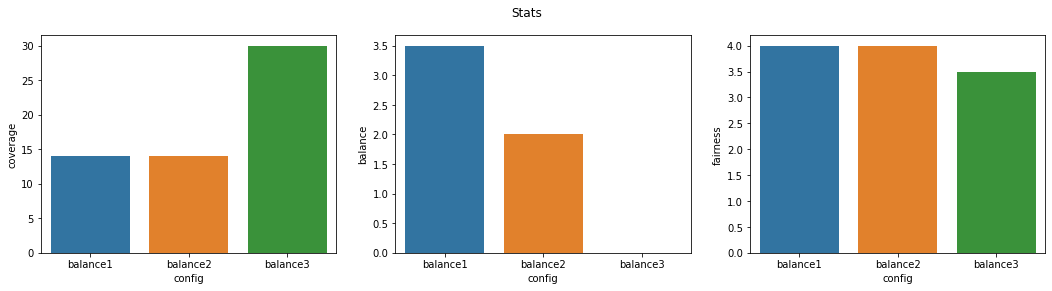

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

fig.suptitle('Stats')


sns.barplot(ax=axes[0], data=df2_bal, x='config', y='coverage')
sns.barplot(ax=axes[1], data=df2_bal, x='config', y='balance')
sns.barplot(ax=axes[2], data=df2_bal, x='config', y='fairness')

<AxesSubplot:xlabel='config', ylabel='fairness'>

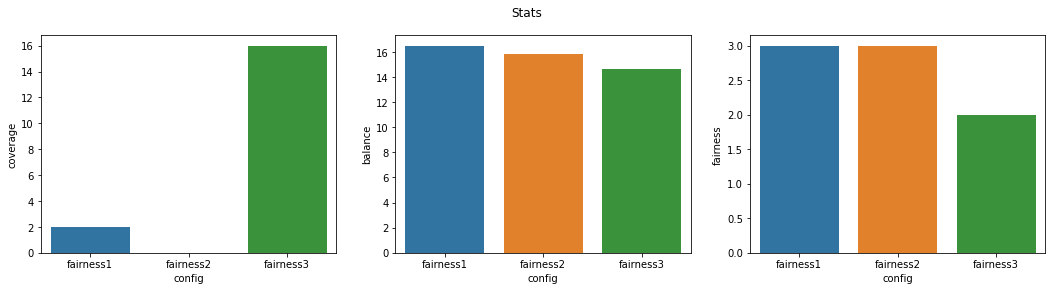

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

fig.suptitle('Stats')


sns.barplot(ax=axes[0], data=df2_fair, x='config', y='coverage')
sns.barplot(ax=axes[1], data=df2_fair, x='config', y='balance')
sns.barplot(ax=axes[2], data=df2_fair, x='config', y='fairness')

<AxesSubplot:xlabel='config', ylabel='fairness'>

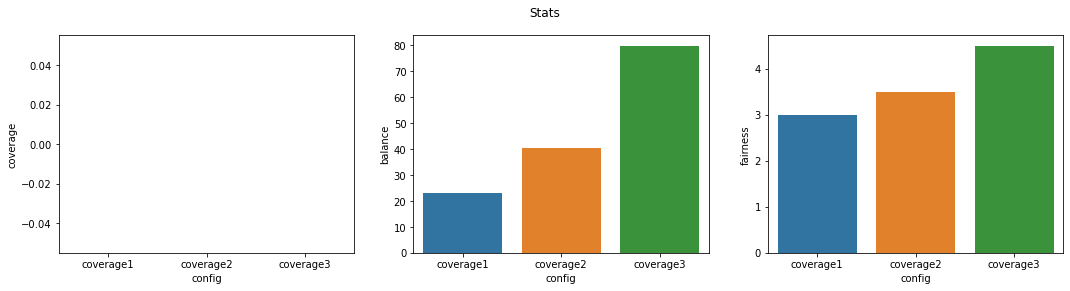

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

fig.suptitle('Stats')


sns.barplot(ax=axes[0], data=df2_cov, x='config', y='coverage')
sns.barplot(ax=axes[1], data=df2_cov, x='config', y='balance')
sns.barplot(ax=axes[2], data=df2_cov, x='config', y='fairness')

<AxesSubplot:xlabel='iteration', ylabel='best'>

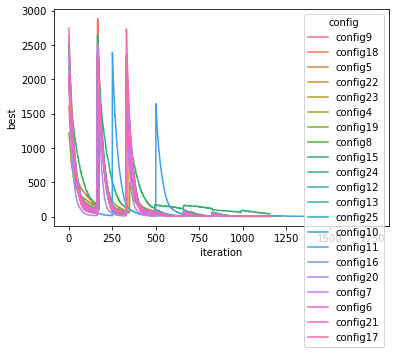

In [158]:
sns.lineplot(data=df, x='iteration', y='best', hue='config')

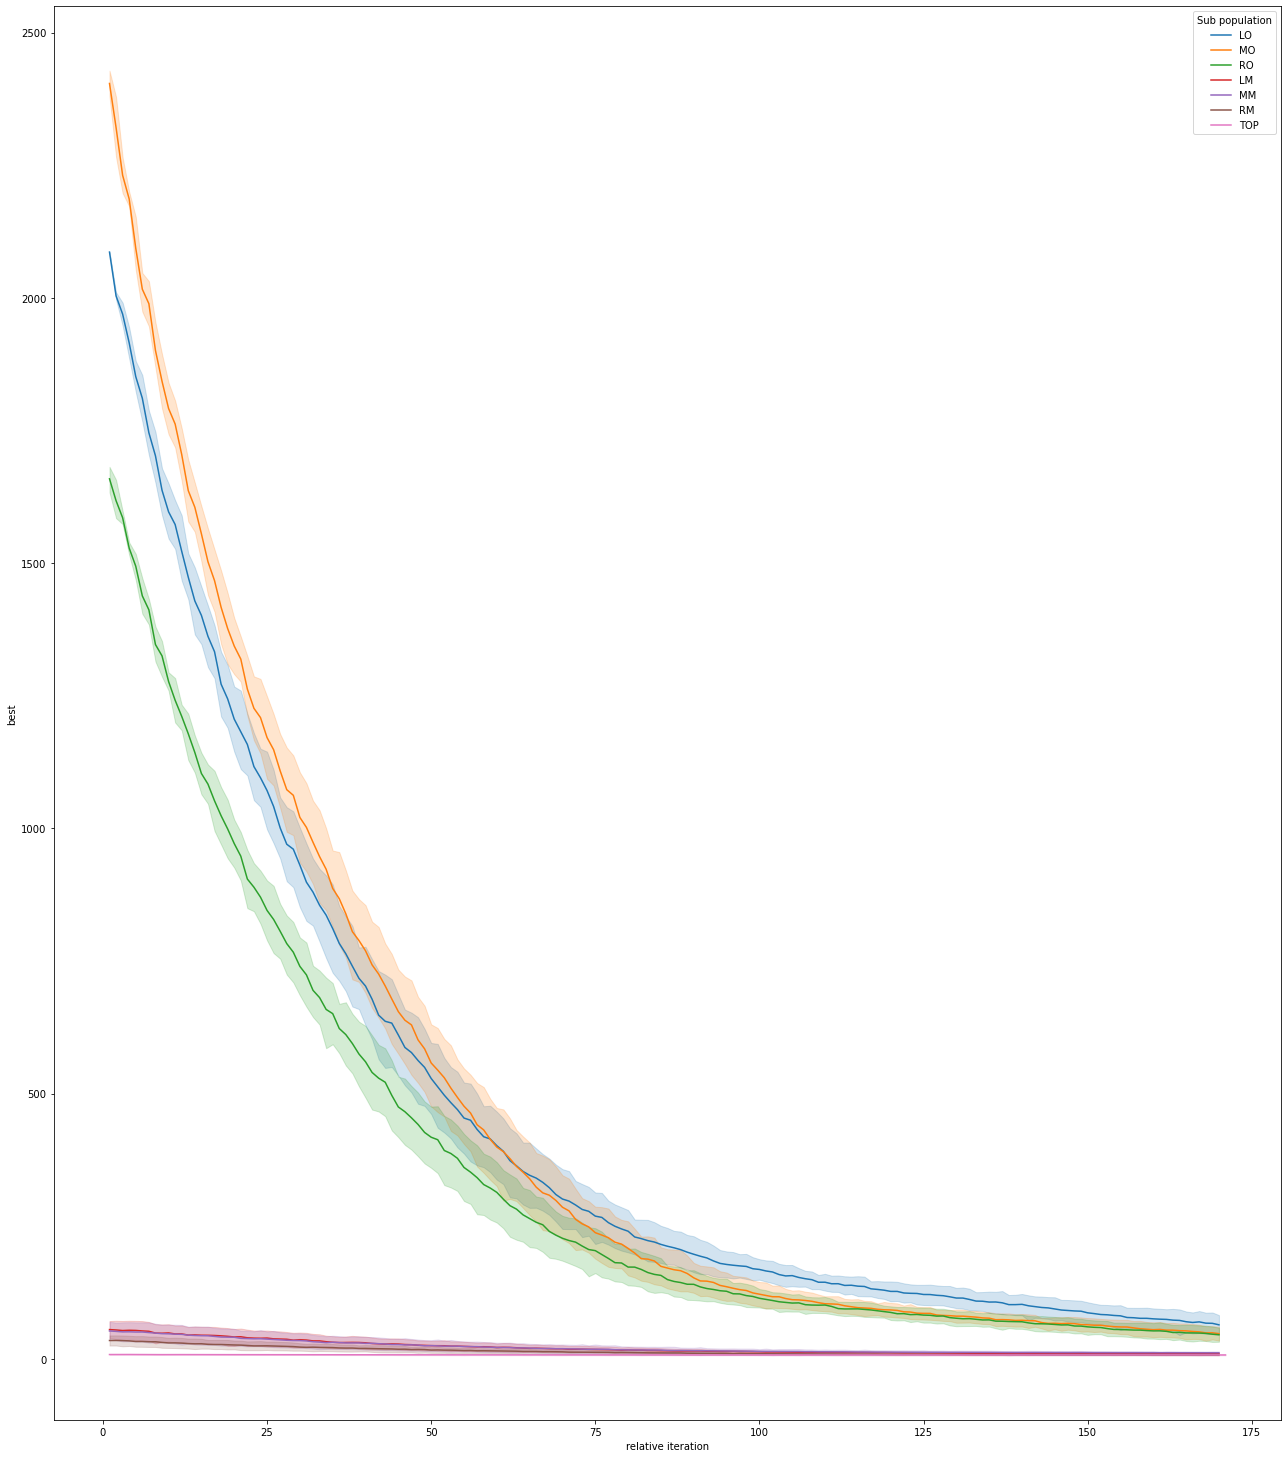

In [204]:
plt.figure(figsize=(22,26))
ax = sns.lineplot(data=df, x="relative iteration", y="best", hue="Sub population")

In [ ]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="config", y="best", data=df,
            label="Total", color="b")

,coverage,best,balance,fairness,avg,time,relative iteration,Sub population,config,iteration
0,4,8.545833,12,3.0,9.360470,1900-01-01 08:11:14,1,LO,config14,1176
1,5,8.970297,12,3.0,9.927730,1900-01-01 08:11:20,1,LO,config14,1193
2,6,7.464844,0,3.0,8.053679,1900-01-01 08:11:15,1,LM,config14,1177
3,7,9.358911,10,3.0,10.122208,1900-01-01 08:11:13,91,LO,config14,1171
4,8,7.137931,0,3.0,7.950478,1900-01-01 08:11:12,1,LM,config14,1170
...,...,...,...,...,...,...,...,...,...,...
1027,1935,763.348790,1777,13.0,866.134258,1900-01-01 08:07:26,1,MRO,config14,544
1028,1943,1717.400000,2053,12.0,2092.730000,1900-01-01 08:06:20,1,MLO,config14,361
1029,1946,1647.466667,1927,16.0,1970.650364,1900-01-01 08:06:21,2,MLO,config14,362
1030,1955,1074.187500,1882,14.5,1251.807188,1900-01-01 08:21:21,2,MRO,config9,542


In [ ]:
sns.barplot(x="day", y="best", hue="config", data=df)

In [56]:
df2

,config,best,coverage,balance,fairness,time
1,config23_balance1,5.625000,14,3.500,4.0,872
6,config23_balance2,3.916667,14,2.000,4.0,800
5,config23_balance3,2.600806,30,0.000,3.5,890
8,config23_coverage1,7.100000,0,22.875,3.0,821
0,config23_coverage2,10.103774,0,40.250,3.5,928
2,config23_coverage3,10.363636,0,79.875,4.5,918
3,config23_fairness1,6.000000,2,16.500,3.0,793
4,config23_fairness2,4.574074,0,15.875,3.0,795
7,config23_fairness3,3.968085,16,14.625,2.0,802


In [40]:
df1 = dfs['config14']
df2 = dfs['config9']

In [41]:
df1['config'] = ['config14'] * len(df1)
df2['config'] = ['config9'] * len(df2)
df1['iteration'] = [i for i in range(1, 1 + len(df1))]
df2['iteration'] = [i for i in range(1, 1 + len(df2))]

In [42]:
df2

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population,config,iteration
0,1398.883117,1750,2396,16.0,1639.054824,1900-01-01 08:17:56,1,LLO,config9,1
1,1402.181818,1752,2418,16.0,1580.520806,1900-01-01 08:17:57,2,LLO,config9,2
2,1385.759740,1757,2206,11.5,1542.988334,1900-01-01 08:17:57,3,LLO,config9,3
3,1341.316558,1713,2030,16.5,1507.947144,1900-01-01 08:17:58,4,LLO,config9,4
4,1335.284091,1678,2224,15.5,1473.542128,1900-01-01 08:17:58,5,LLO,config9,5
...,...,...,...,...,...,...,...,...,...,...
2336,7.484375,6,0,3.0,8.119908,1900-01-01 08:31:56,177,TOP,config9,2337
2337,7.484375,6,0,3.0,8.102255,1900-01-01 08:31:57,178,TOP,config9,2338
2338,7.484375,6,0,3.0,8.111037,1900-01-01 08:31:57,179,TOP,config9,2339
2339,7.484375,6,0,3.0,8.128746,1900-01-01 08:31:57,180,TOP,config9,2340


In [43]:
df1.append(df2, ignore_index=True)

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population,config,iteration
0,1435.417722,1750,2396,16.0,1676.480902,1900-01-01 08:03:57,1,LLO,config14,1
1,1435.417722,1750,2396,16.0,1614.102044,1900-01-01 08:03:58,2,LLO,config14,2
2,1418.088608,1806,1954,15.0,1575.035972,1900-01-01 08:03:59,3,LLO,config14,3
3,1370.536392,1710,2060,13.0,1535.504278,1900-01-01 08:03:59,4,LLO,config14,4
4,1349.650316,1659,2144,17.5,1498.543963,1900-01-01 08:04:00,5,LLO,config14,5
...,...,...,...,...,...,...,...,...,...,...
4677,7.484375,6,0,3.0,8.119908,1900-01-01 08:31:56,177,TOP,config9,2337
4678,7.484375,6,0,3.0,8.102255,1900-01-01 08:31:57,178,TOP,config9,2338
4679,7.484375,6,0,3.0,8.111037,1900-01-01 08:31:57,179,TOP,config9,2339
4680,7.484375,6,0,3.0,8.128746,1900-01-01 08:31:57,180,TOP,config9,2340
